In [95]:
import numpy as np
X=2*np.random.rand(100,1) # 一个形状为 (100, 1) 的随机数数组 X，这些随机数是从均匀分布 [0, 1) 中随机抽取的
y=3*X+4+np.random.randn(100,1) #随机噪声：一个形状为 (100, 1) 的随机数数组 X，这些随机数是从标准正态分布中随机抽取的
print(X,y)

[[1.53264632]
 [0.23709757]
 [1.38584636]
 [0.80008794]
 [0.74292341]
 [1.77005782]
 [0.93915893]
 [1.0707705 ]
 [0.88724901]
 [1.68273518]
 [0.18709675]
 [0.68316839]
 [0.43328424]
 [0.07331393]
 [0.29272876]
 [0.72749729]
 [0.9327204 ]
 [1.89300356]
 [0.27803342]
 [1.96874586]
 [0.42277475]
 [0.51447388]
 [1.65619786]
 [0.50586383]
 [0.25346774]
 [1.11326546]
 [1.45644826]
 [1.19419261]
 [0.57927925]
 [1.08963015]
 [1.13077452]
 [1.89650398]
 [0.79525014]
 [0.34359571]
 [1.59170117]
 [1.64134343]
 [1.68475233]
 [0.89607769]
 [0.6208004 ]
 [1.38098149]
 [1.44150117]
 [0.503144  ]
 [1.61234355]
 [1.79629266]
 [1.23369526]
 [0.20639726]
 [0.04530932]
 [1.359981  ]
 [1.58407536]
 [0.59004132]
 [1.84918095]
 [1.53333868]
 [0.61041754]
 [0.0124317 ]
 [0.78075965]
 [0.24751106]
 [0.04982134]
 [0.31369871]
 [1.77557515]
 [1.26546683]
 [0.21601647]
 [0.8923246 ]
 [0.20502626]
 [1.50510283]
 [0.39591633]
 [0.03316438]
 [0.47651942]
 [1.43266008]
 [0.90456375]
 [0.28659892]
 [0.27356888]
 [1.06

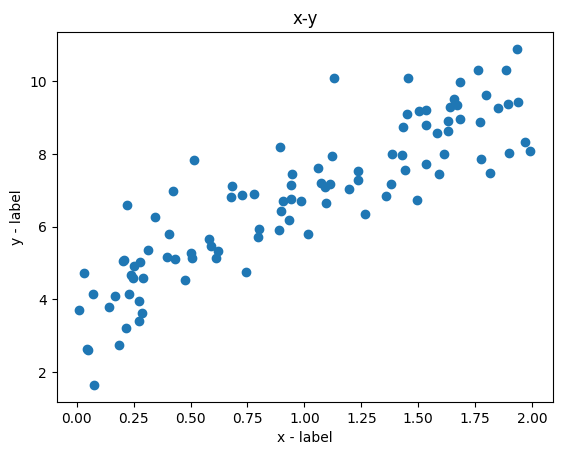

In [97]:
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.title('x-y')
plt.xlabel('x - label')
plt.ylabel("y - label")
plt.show()

In [79]:
X_hat=np.c_[X,np.ones((100,1))]
theta_hat=np.linalg.inv(X_hat.T.dot(X_hat)).dot(X_hat.T).dot(y)
print(theta_hat)

[[3.00638383]
 [4.07344246]]


In [80]:
X_new=np.array([[1.25],[1.5]])
X_hat=np.c_[X_new,np.ones((2,1))]
y_predict=X_hat.dot(theta_hat)
print(y_predict)

[[7.83142226]
 [8.58301821]]


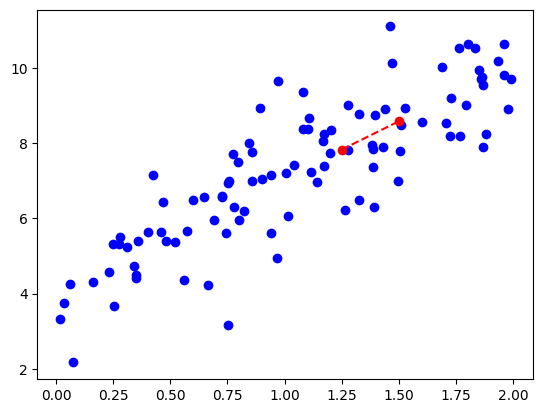

In [93]:
# plt.scatter(X,y)
plt.plot(X,y,'bo')
plt.plot(X_new,y_predict,'r--o')
plt.show()

# 最小二乘法

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([3.94502192]), array([[3.08615852]]))

In [8]:
lin_reg.predict(X_new)

array([[7.80272007],
       [8.57425969]])

# 批量梯度下降

In [20]:
learning_rate=0.1
n_iteration=1000
m=100
theta=np.random.randn(2,1)
for iteration in range(n_iteration):
    grad=2/m*X_hat.T.dot(X_hat.dot(theta)-y)
    theta-=learning_rate*grad

theta

array([[2.96153697],
       [4.00998534]])

In [31]:
b=np.array([[12,12],[1,1]])
print(b[1:2])
print(b[1:2].ravel())

[[1 1]]
[1 1]


# 随机梯度下降

In [76]:
n_epochs=100
t0,t1=5,50
m=50

def learning_schedule(t):
    return t0/(t1+t)

theta=np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index=np.random.randint(m)
        xi=X_hat[random_index:random_index+1]
        yi=y[random_index:random_index+1]
        grad=2*xi.T.dot(xi.dot(theta)-yi)
        eta=learning_schedule(epoch*m+i)
        theta-=eta*grad

theta

array([[2.80660081],
       [3.93418083]])

In [29]:
from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor(max_iter=1000,tol=1e-3,penalty=None,eta0=0.1)
sgd_reg.fit(X,y.ravel())
sgd_reg.intercept_,sgd_reg.coef_

D:\Anaconda\envs\pylearn\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([4.25295422]), array([2.67402882]))